In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from IPython import display
import graphviz
import numpy as np
import matplotlib.pyplot as plt


In [15]:
#Load Dataset
data = pd.read_csv('ParticipantsData.csv')

# Clean the data
sex_encoder = LabelEncoder()
data['Sex'] = sex_encoder.fit_transform(data['Sex'])

tug_risk_encoder = LabelEncoder()
data['TUG_Risk'] = tug_risk_encoder.fit_transform(data['TUG_Risk'])

data.to_csv('cleaned_ParticipantsData.csv', index=False)

In [16]:
# Multiple Linear Regression

data = pd.read_csv('cleaned_ParticipantsData.csv')

X = data[['Smoking_Behavior', 'UD_HighBloodPress', 'UD_HighCholesterol',
          'UD_Diabetes', 'UD_MuscleWeakness', 'UD_Stroke', 'UD_HeartDisease', 'MOCA_Risk']]
y = data['TUG_Risk']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               TUG_Risk   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     1.542
Date:                Thu, 25 Apr 2024   Prob (F-statistic):              0.197
Time:                        13:18:40   Log-Likelihood:                -18.537
No. Observations:                  34   AIC:                             53.07
Df Residuals:                      26   BIC:                             65.29
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3227      0

In [17]:
# Naive Bayes
nb_classifier = GaussianNB()

# Use Leave-One-Out Cross-Validation
leave_one_out = LeaveOneOut()

accuracies = []

for train_index, test_index in leave_one_out.split(X):
    # Separate data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Implement Naive Bayes classifier on training data
    nb_classifier.fit(X_train, y_train)
    y_pred = nb_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

average_accuracy = sum(accuracies) / len(accuracies)
print("Average Accuracy in Predicting TUG Risk:", average_accuracy)

Average Accuracy in Predicting TUG Risk: 0.5882352941176471


Average Accuracy in Predicting TUG Risk using a Decision Tree: 0.7058823529411765


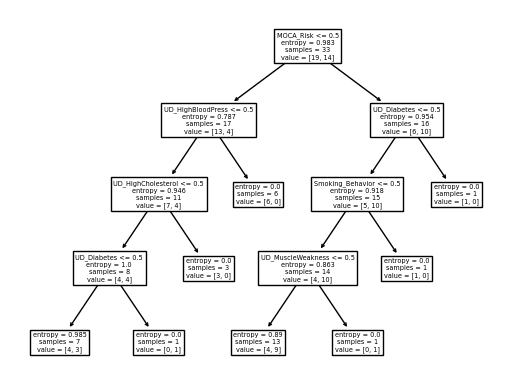

In [18]:
# Use Leave-One-Out Cross-Validation
leave_one_out = LeaveOneOut()

accuracies = []

feature_names = X.columns.to_list()

for train_index, test_index in leave_one_out.split(X):
    # Separate data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #Create Decision Tree Classifier
    dtc = DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth=4)

    #Train Decision Tree and plot
    dtc = dtc.fit(X_train, y_train)
    tree.plot_tree(dtc, feature_names=feature_names)

    #Predict values for test data
    y_pred = dtc.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

#Print out information about the accuracy
average_accuracy = sum(accuracies) / len(accuracies)
print("Average Accuracy in Predicting TUG Risk using a Decision Tree:", average_accuracy)


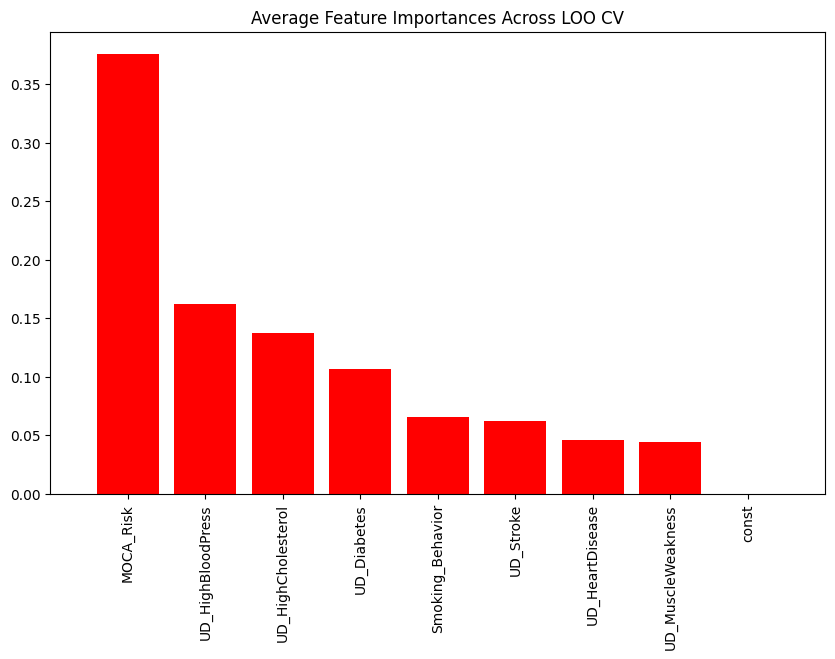

Average Accuracy in Predicting TUG Risk using a Random Forest: 0.6764705882352942


In [19]:
# Code assisted with Chat-GPT 3.5 and 4.
# Initialize Leave-One-Out cross-validator
leave_one_out = LeaveOneOut()

accuracies = []
cumulative_importances = np.zeros(X.shape[1])  # Array to store cumulative importances

for train_index, test_index in leave_one_out.split(X):
    # Separate data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create and train Random Forest Classifier
    rfc = RandomForestClassifier(max_depth=3)
    rfc.fit(X_train, y_train)

    # Predict values for test data
    y_pred = rfc.predict(X_test)

    # Accumulate feature importances
    cumulative_importances += rfc.feature_importances_

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Average the accumulated feature importances
average_importances = cumulative_importances / leave_one_out.get_n_splits(X)

# Sort the feature importances in descending order and get the indices
indices = np.argsort(average_importances)[::-1]
# Arrange your feature names according to the indices
features = X.columns[indices]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title('Average Feature Importances Across LOO CV')
plt.bar(range(X.shape[1]), average_importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), features, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Print out information about the average accuracy
average_accuracy = np.mean(accuracies)
print("Average Accuracy in Predicting TUG Risk using a Random Forest:", average_accuracy)